In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install -U scikit-learn

#**13 inputs training model with policies introduced**

In [38]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)

dd = df[df["ISO3"] == "KOR"]
# sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
dd.head()

ISO3  MVAR1     DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  OVAR7  \
DATE                                                                            
31DEC19  KOR    NaN  31DEC19    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
01JAN20  KOR    NaN  01JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
02JAN20  KOR    NaN  02JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
03JAN20  KOR    NaN  03JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
04JAN20  KOR    NaN  04JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   

         OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                     
31DEC19     NaN     NaN     NaN     NaN     NaN     NaN  
01JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
02JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
03JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
04JAN20     0.0     0.0     0.0     0.0     0.0     0.0

In [39]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [40]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ISO3  MVAR1       DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  \
DATE                                                                       
23JAN20  KOR    1.0 2020-01-23    0.0    0.0    1.0    0.0    0.0    0.0   
24JAN20  KOR    2.0 2020-01-24    0.0    0.0    2.0    0.0    0.0    0.0   
25JAN20  KOR    2.0 2020-01-25    0.0    0.0    2.0    0.0    0.0    0.0   
26JAN20  KOR    3.0 2020-01-26    0.0    0.0    3.0    0.0    0.0    0.0   
27JAN20  KOR    4.0 2020-01-27    0.0    0.0    4.0    0.0    0.0    0.0   

         OVAR7  OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                            
23JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
24JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
26JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
27JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0

In [41]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
ddf.drop(columns=["DATE", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.head() 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MVAR1  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  OVAR7  OVAR11  \
DATE                                                                      
23JAN20    1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
24JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0     0.0   
25JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0     0.0   
26JAN20    3.0    0.0    0.0    3.0    0.0    0.0    0.0    0.0     0.0   
27JAN20    4.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0     0.0   

         OVAR13  OVAR15  OVAR21  OVAR24  
DATE                                     
23JAN20     0.0     0.0     0.0     0.0  
24JAN20     0.0     0.0     0.0     0.0  
25JAN20     0.0     0.0     0.0     0.0  
26JAN20     0.0     0.0     0.0     0.0  
27JAN20     0.0     0.0     0.0     0.0

In [42]:
ddf.tail() 

MVAR1   MVAR2     MVAR3    MVAR4  OVAR1  OVAR3  OVAR5  OVAR7  \
DATE                                                                       
08JUL21  165344.0  2036.0  152498.0  10810.0    1.0    1.0    1.0    3.0   
09JUL21  166722.0  2038.0  153153.0  11531.0    1.0    1.0    1.0    3.0   
10JUL21  168046.0  2043.0  153760.0  12243.0    1.0    1.0    1.0    3.0   
11JUL21  169146.0  2044.0  154187.0  12915.0    1.0    1.0    1.0    3.0   
12JUL21  170296.0  2046.0  154752.0  13498.0    2.0    1.0    2.0    3.0   

         OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  
DATE                                             
08JUL21     0.0     0.0     1.0     1.0     2.0  
09JUL21     0.0     0.0     1.0     1.0     2.0  
10JUL21     0.0     0.0     1.0     1.0     2.0  
11JUL21     0.0     0.0     1.0     1.0     2.0  
12JUL21     0.0     0.0     1.0     1.0     2.0

AttributeError: ignored

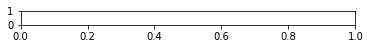

In [43]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5,6,7,8,9, 10,11,12]
# groups = [4, 5,6,7,8, 9, 10, 11, 12, 13]
# color =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G', 'R']
color = ['#BB0000', '#0000BB', 'green', 'red', 'yellow', 'purple']

i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [16, 49]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group], colors=color)
	pyplot.title(ddf.columns[group], y=0.5, loc='right')
	i += 1

# plt.savefig('13_variables_graph.png')
# plt.savefig("13_var_out_1.png",dpi=500)
pyplot.show()

#### **LSTM DATA PREPARATION**

In [44]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 13)


In [45]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
# use below one with relu ok
scaler = MinMaxScaler(feature_range=(0, 5))
# correct one below with tanh
# scaler = MinMaxScaler(feature_range=(-1, 1))

# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 13
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
reframed.drop(reframed.columns[[43,44,45,46,47,48,49,50,51]], axis=1, inplace=True)
print(reframed.shape)

# 24 input features and 8 output features 

(534, 43)


In [46]:
reframed.head()

var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3   0.000000        0.0        0.0   0.000000        0.0        0.0   
4   0.000029        0.0        0.0   0.000277        0.0        0.0   
5   0.000029        0.0        0.0   0.000277        0.0        0.0   
6   0.000059        0.0        0.0   0.000553        0.0        0.0   
7   0.000088        0.0        0.0   0.000830        0.0        0.0   

   var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  ...  var8(t-1)  var9(t-1)  \
3        0.0        0.0        0.0         0.0  ...        0.0        0.0   
4        0.0        0.0        0.0         0.0  ...        0.0        0.0   
5        0.0        0.0        0.0         0.0  ...        0.0        0.0   
6        0.0        0.0        0.0         0.0  ...        0.0        0.0   
7        0.0        0.0        0.0         0.0  ...        0.0        0.0   

   var10(t-1)  var11(t-1)  var12(t-1)  var13(t-1)   var1(t)  var2(t)  var3(t)  \
3         0.0         0.0         0.0         0.0  0.000059      0.0      0.0   
4         0.0         0.0         0.0         0.0  0.000088      0.0      0.0   
5         0.0         0.0         0.0         0.0  0.000088      0.0      0.0   
6         0.0         0.0         0.0         0.0  0.000088      0.0      0.0   
7         0.0         0.0         0.0         2.5  0.000088      0.0      0.0   

    var4(t)  
3  0.000553  
4  0.000830  
5  0.000830  
6  0.000830  
7  0.000830  

[5 rows x 43 columns]

In [47]:
# split into train and test sets
values = reframed.values
n_train_hours = 400
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (400, 43)
Testing data shape:  (134, 43)


In [48]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -4:]
test_X, test_y = test[:, :n_obs], test[:, -4:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

39
Training split shape:  (400, 39) 400 (400, 4)
Testing split shape:  (134, 39) 134 (134, 4)


In [49]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(400, 3, 13) (400, 4) (134, 3, 13) (134, 4)


correct one below

In [ ]:
# # Model with tan activation function
# model = Sequential()
# model.add(Bidirectional(LSTM(184, return_sequences=True, activation='tanh'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
# # model.add(Bidirectional(LSTM(124, return_sequences=True, activation='tanh'), merge_mode="concat"))

# model.add(Bidirectional(LSTM(164, activation='tanh'), merge_mode="concat"))  # best neurons 164 or 124
# # 1st layer 184, 2nd layer 164

# # model.add(LSTM(32, activation="tanh"))
# model.add(Dense(train_y.shape[1]))

# adam = tf.keras.optimizers.Adam()
# ear_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=100,  # best is 100
#     mode='min', restore_best_weights=True
# )
# # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
# rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.42, patience=30)  # factor is 0.42 patience 30
# model.compile(loss=tf.losses.MeanAbsoluteError(),
#               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

# history = model.fit(train_X, train_y, epochs=4500, callbacks = [ear_stop, rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=2, shuffle=False)  # batch_size  best 108   -> shuffle false

NameError: ignored

In [ ]:
# # Model with Relu activation function
# model = Sequential()
# model.add(Bidirectional(LSTM(184, return_sequences=True, activation='relu'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
# # model.add(Bidirectional(LSTM(124, return_sequences=True, activation='tanh'), merge_mode="concat"))

# model.add(Bidirectional(LSTM(164, activation='relu'), merge_mode="concat"))  # best neurons 164 or 124
# # 1st layer 184, 2nd layer 164

# # model.add(LSTM(32, activation="tanh"))
# model.add(Dense(train_y.shape[1]))

# adam = tf.keras.optimizers.Adam()
# ear_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=100,  # best is 100
#     mode='min', restore_best_weights=True
# )
# # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
# rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.42, patience=30)  # factor is 0.42 patience 30
# model.compile(loss=tf.losses.MeanAbsoluteError(),
#               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

# history = model.fit(train_X, train_y, epochs=4500, callbacks = [ear_stop, rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=2, shuffle=True)  # batch_size  best 108   -> shuffle True

Epoch 1/4500
4/4 - 5s - loss: 0.7072 - mean_absolute_error: 0.7072 - val_loss: 2.4086 - val_mean_absolute_error: 2.4086
Epoch 2/4500
4/4 - 0s - loss: 0.5135 - mean_absolute_error: 0.5135 - val_loss: 1.8437 - val_mean_absolute_error: 1.8437
Epoch 3/4500
4/4 - 0s - loss: 0.3383 - mean_absolute_error: 0.3383 - val_loss: 0.7836 - val_mean_absolute_error: 0.7836
Epoch 4/4500
4/4 - 0s - loss: 0.2623 - mean_absolute_error: 0.2623 - val_loss: 0.4817 - val_mean_absolute_error: 0.4817
Epoch 5/4500
4/4 - 0s - loss: 0.2085 - mean_absolute_error: 0.2085 - val_loss: 0.7571 - val_mean_absolute_error: 0.7571
Epoch 6/4500
4/4 - 0s - loss: 0.1628 - mean_absolute_error: 0.1628 - val_loss: 0.6641 - val_mean_absolute_error: 0.6641
Epoch 7/4500
4/4 - 0s - loss: 0.1330 - mean_absolute_error: 0.1330 - val_loss: 0.5561 - val_mean_absolute_error: 0.5561
Epoch 8/4500
4/4 - 0s - loss: 0.1190 - mean_absolute_error: 0.1190 - val_loss: 0.4086 - val_mean_absolute_error: 0.4086
Epoch 9/4500
4/4 - 0s - loss: 0.0982 - m

In [50]:
# model.save('/content/drive/MyDrive/Korea university work/publication/13variables_rmse_RELU_3391')  # 13variables_rmse_2348
from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/13variables_rmse_2348')
model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/13variables_rmse_RELU_3391')
# model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/13variables_rmse_RELU_4704')

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 3, 368)            291456    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 328)               699296    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1316      
Total params: 992,068
Trainable params: 992,068
Non-trainable params: 0
_________________________________________________________________


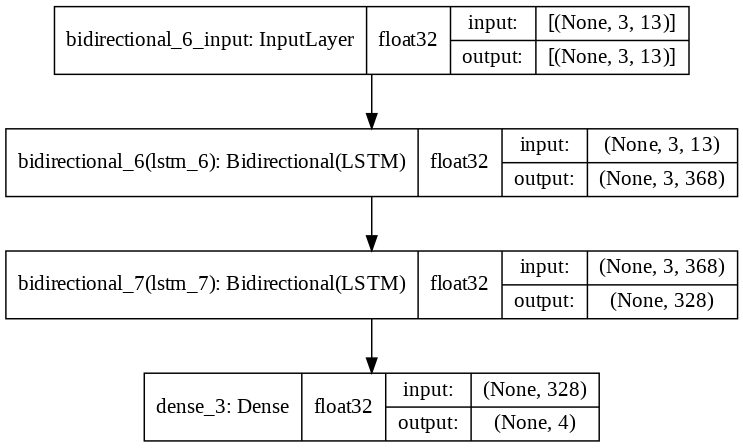

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=106,
    layer_range=None,
)

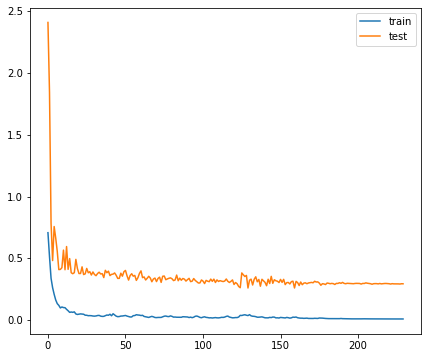

In [ ]:
# plot history

pyplot.figure()
pyplot.rcParams['figure.figsize'] = [7, 6]
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('13_variables_lossRate_With_RELU.png')
pyplot.show()

In [51]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
print(test_X.shape)
print("yhat : ", yhat.shape)

(134, 39)
yhat :  (134, 4)


In [52]:
inv_yhat = concatenate((yhat, test_X[:, -9:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, :4] 

test_y = test_y.reshape((len(test_y), 4))
inv_y = concatenate((test_y, test_X[:, -9:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, :4]

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# best rmse 2348
# relu rmse 3391   , with normalization 0 - 5

Test RMSE: 3391.062


In [21]:
# inv_yhat = concatenate((yhat, test_X[:, -9:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:, :4] 

# test_y = test_y.reshape((len(test_y), 4))
# inv_y = concatenate((test_y, test_X[:, -9:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:, :4]

rmse = sqrt(mean_squared_error(inv_y[:, 0], inv_yhat[:, 0]))
print('Test RMSE: %.3f' % rmse)
# best rmse 2348
# relu rmse 3391   , with normalization 0 - 5

Test RMSE: 3673.156


In [27]:
# inv_y[:, 0].shape

(134,)

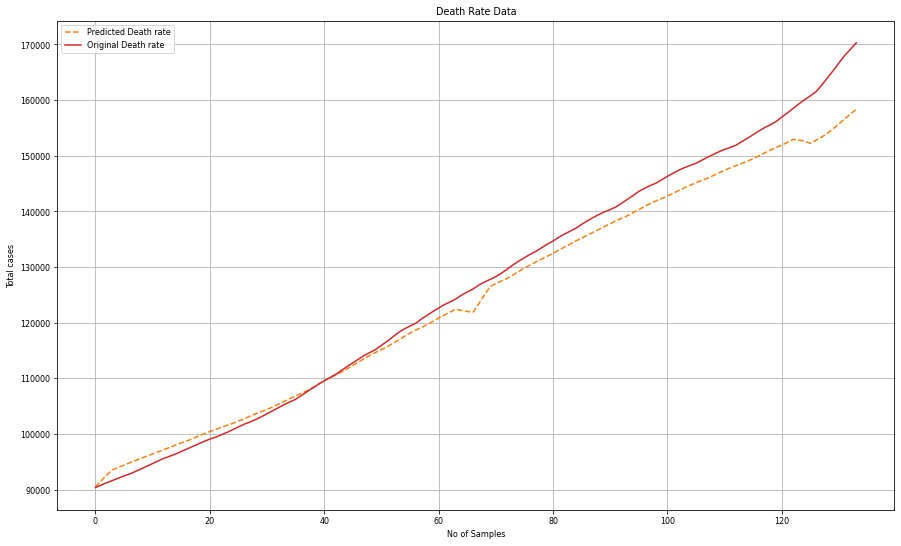

In [ ]:
dd = np.arange(134)
dd.shape

plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(15, 9))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
ax.plot(dd, inv_yhat[:, 0], color='tab:orange', label='Predicted Death rate', linestyle='dashed')
ax.plot(dd, inv_y[:, 0], color='tab:red', label='Original Death rate')

# Same as above
ax.set_xlabel('No of Samples')
ax.set_ylabel('Total cases')
ax.set_title('Death Rate Data')
ax.grid(True)
ax.legend(loc='upper left');
plt.savefig('5_iNPUTVariables_outV1.png')

### **Fitting model on training data**

In [20]:

# make a prediction
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
print(train_X.shape)

(400, 39)


In [21]:
inv_yhat_train = concatenate((yhat_train, train_X[:, -9:]), axis=1)
inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
inv_yhat_train = inv_yhat_train[:, :4] 

train_y = train_y.reshape((len(train_y), 4))
inv_y_train = concatenate((train_y, train_X[:, -9:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:, :4]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Test RMSE: %.3f' % rmse)
# best rmse 4212

Test RMSE: 1539.102


# Combining both training and test data

In [22]:
comb_d = np.concatenate((inv_y_train, inv_y))
comb_p = np.concatenate((inv_yhat_train, inv_yhat))
comb_p.shape

(534, 4)

####**PLotting graphs**

In [23]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted New Quarantined Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]



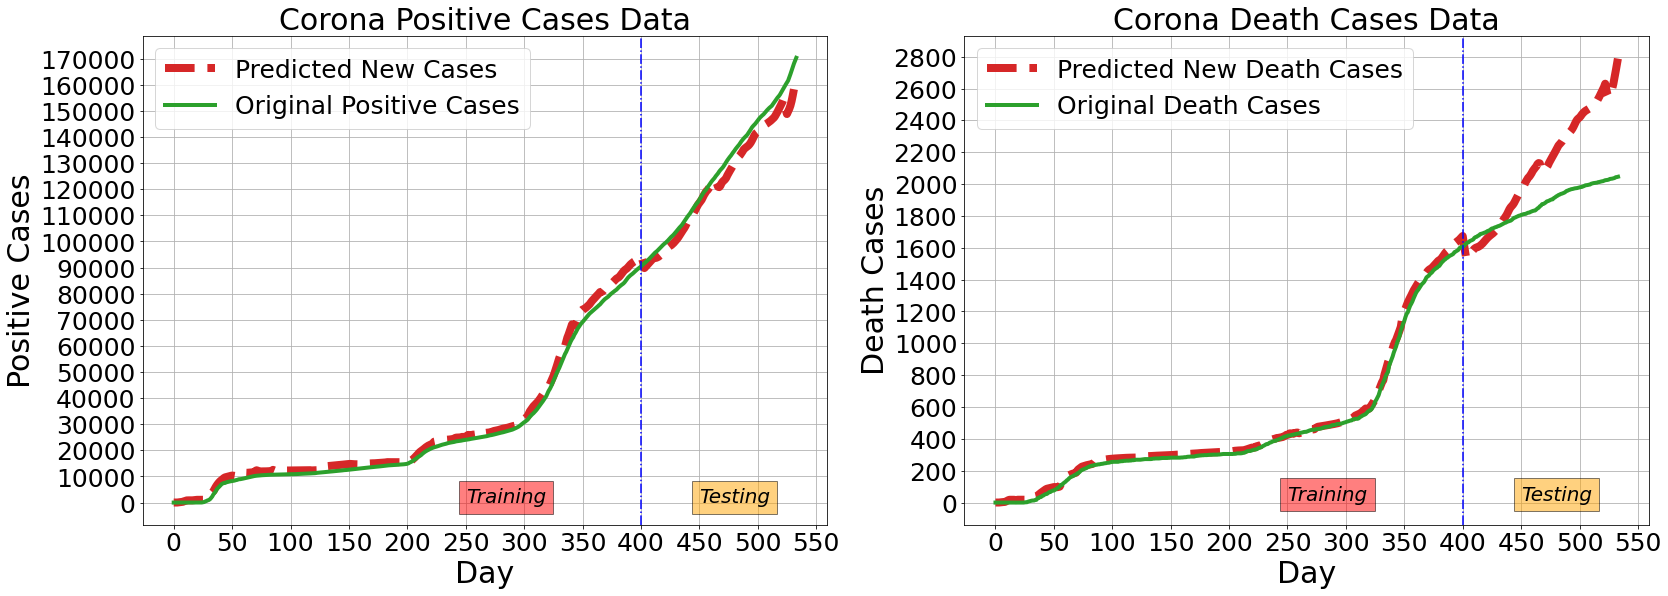

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rc('font', size=25)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 0], color='tab:red', label=L22[0], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 0], color='tab:green', label=L20[0], linewidth=4)
ax2.plot(comb_p[:, 1], color='tab:red', label=L22[1], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 1], color='tab:green', label=L20[1],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
ax1.set_ylabel("Positive Cases")
ax1.set_title(L21[0])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 25})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

ax2.set_xlabel('Day')
ax2.set_ylabel("Death Cases")
ax2.set_title(L21[1])
ax2.grid(True)
ax2.legend(loc='upper left');

plt.savefig("13_var_out_RELU_1.png",dpi=200)

In [ ]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted New Quarantined\n                Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]


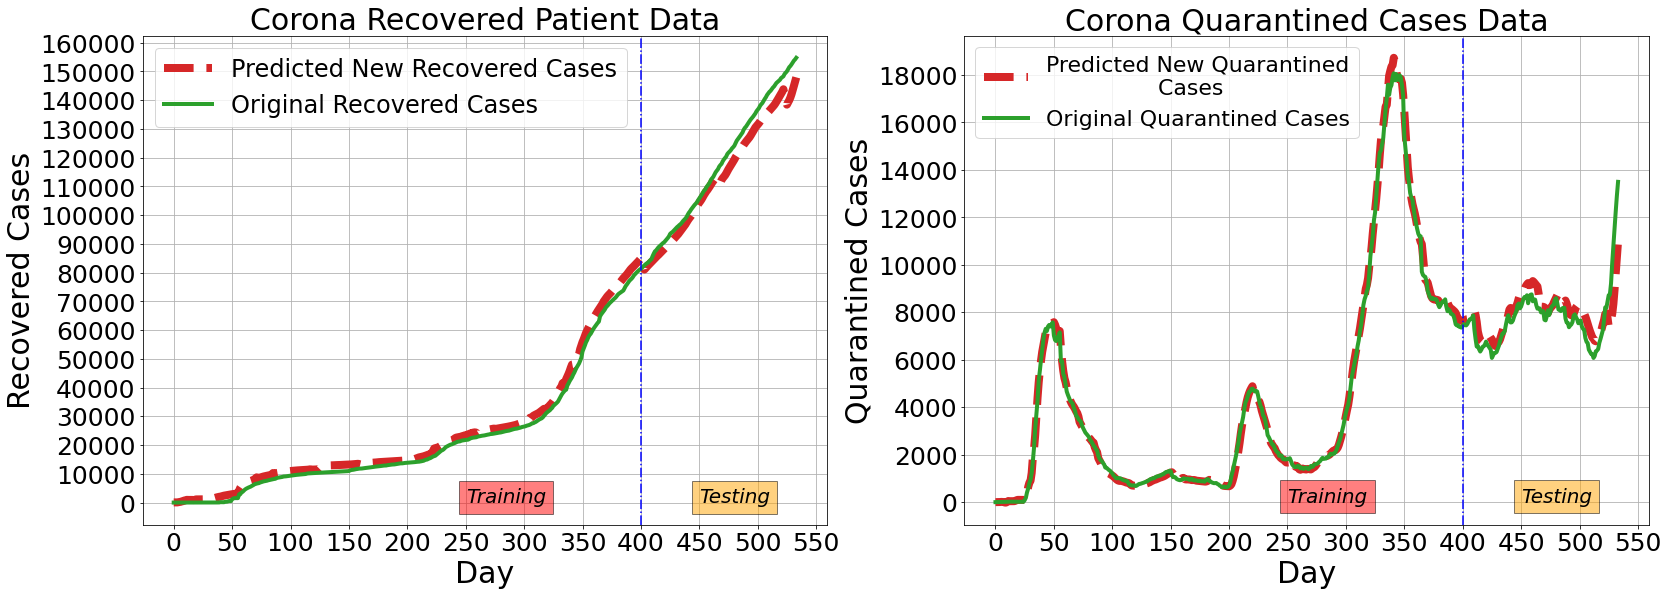

In [ ]:
from matplotlib.pyplot import figure
plt.rc('font', size=24)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 2], color='tab:red', label=L22[2], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 2], color='tab:green', label=L20[2], linewidth=4)
ax2.plot(comb_p[:, 3], color='tab:red', label=L22[3], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 3], color='tab:green', label=L20[3],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
ax1.set_ylabel(L23[2])
ax1.set_title(L21[2])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 22})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

ax2.set_xlabel('Day')
ax2.set_ylabel(L23[3])
ax2.set_title(L21[3])
ax2.grid(True)
ax2.legend(loc='upper left');

plt.savefig("13_var_out_RELU_2.png",dpi=200)

In [ ]:
# !pip install -U scikit-learn

     |████████████████████████████████| 23.1 MB 69.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [38]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(yhat, test_y)
print("Error in percentage MAE:", mae)
mae = MAE(inv_yhat, inv_y)
print("Total Error MAE: ", mae)

mape = mean_absolute_percentage_error(yhat, test_y)
print("Error in percentage MAPE:", mape)
mape = mean_absolute_percentage_error(inv_yhat, inv_y)
print("Total Error MAPE: ", mape)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Error in percentage MAE: 0.25951773
Total Error MAE:  2231.4846
Error in percentage MAPE: 0.06094756
Total Error MAPE:  0.06094551
Test RMSE: 3391.062


In [62]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE
mae = MAE(inv_yhat[:, 3], inv_y[:, 3])
print("Error in percentage MAE:", mae)

Error in percentage MAE: 516.9972


In [63]:
rmse = sqrt(mean_squared_error(inv_y[:, 3], inv_yhat[:, 3]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 729.980


In [64]:
mape = mean_absolute_percentage_error(inv_yhat[:, 3], inv_y[:, 3])
print("Total Error MAPE: ", mape)

Total Error MAPE:  0.063741565


#### Finding mean absolute error for different days

In [ ]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(dataset.columns):
  print(i)
  for j in range(1,6):
    print("Day ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
    # print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index]))
  print()
  print()

In [ ]:
inv_y[50][0]

115926.0

# **Training on 14 inputs Params**

In [65]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)

dd = df[df["ISO3"] == "KOR"]
# sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
dd.head()

ISO3  MVAR1     DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  OVAR7  \
DATE                                                                            
31DEC19  KOR    NaN  31DEC19    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
01JAN20  KOR    NaN  01JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
02JAN20  KOR    NaN  02JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
03JAN20  KOR    NaN  03JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
04JAN20  KOR    NaN  04JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   

         OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                     
31DEC19     NaN     NaN     NaN     NaN     NaN     NaN  
01JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
02JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
03JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
04JAN20     0.0     0.0     0.0     0.0     0.0     0.0

In [66]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [67]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ISO3  MVAR1       DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  \
DATE                                                                       
23JAN20  KOR    1.0 2020-01-23    0.0    0.0    1.0    0.0    0.0    0.0   
24JAN20  KOR    2.0 2020-01-24    0.0    0.0    2.0    0.0    0.0    0.0   
25JAN20  KOR    2.0 2020-01-25    0.0    0.0    2.0    0.0    0.0    0.0   
26JAN20  KOR    3.0 2020-01-26    0.0    0.0    3.0    0.0    0.0    0.0   
27JAN20  KOR    4.0 2020-01-27    0.0    0.0    4.0    0.0    0.0    0.0   

         OVAR7  OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                            
23JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
24JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
26JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
27JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0

In [68]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
ddf.drop(columns=["DATE", "ISO3"], axis=1, inplace=True)
ddf.head() 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MVAR1  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  OVAR7  OVAR11  \
DATE                                                                      
23JAN20    1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
24JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0     0.0   
25JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0     0.0   
26JAN20    3.0    0.0    0.0    3.0    0.0    0.0    0.0    0.0     0.0   
27JAN20    4.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0     0.0   

         OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                             
23JAN20     0.0     0.0     0.0     0.0     0.0  
24JAN20     0.0     0.0     0.0     0.0     0.0  
25JAN20     0.0     0.0     0.0     0.0     0.0  
26JAN20     0.0     0.0     0.0     0.0     0.0  
27JAN20     0.0     0.0     0.0     0.0     0.0

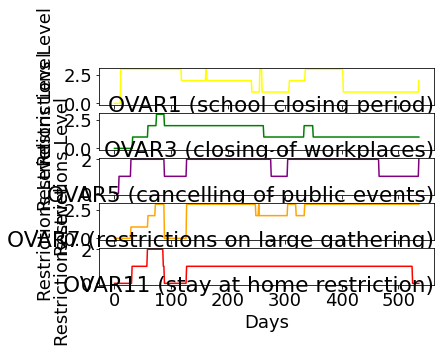

In [69]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

plt.rc('font', size=18)
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
# groups = [0, 1, 2, 3, 4, 5,6,7,8,9, 10, 11, 12, 13]
# groups = [0, 1, 2, 3]
groups = [4, 5,6,7,8]
# groups = [9, 10, 11, 12, 13]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [14, 29]
# pyplot.rcParams['figure.figsize'] = [14, 23]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	if group == 4:
		pyplot.plot(values[:, group],  color='yellow')
		pyplot.title(ddf.columns[group] + " (school closing period)", y=0.2, pad=-14,  loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)
	if group == 5:
		pyplot.plot(values[:, group],  color='green')
		pyplot.title(ddf.columns[group] + " (closing of workplaces)", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)
	
	if group == 6:
		pyplot.plot(values[:, group],  color='purple')
		pyplot.title(ddf.columns[group] + " (cancelling of public events)", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)

	if group == 7:
		pyplot.plot(values[:, group],  color='orange')
		pyplot.title(ddf.columns[group] + " (restrictions on large gathering)", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)

	if group == 8:
		pyplot.plot(values[:, group],  color='red')
		pyplot.title(ddf.columns[group] + " (stay at home restriction)", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)

	# pyplot.plot(values[:, group],  color='green')
	# plt.xlabel("Days")
	# plt.ylabel("Restriction Level")
	# pyplot.title(ddf.columns[group] + "(asds)", y=0.5, loc='right')
	i += 1

# plt.xlabel("Days")
# plt.ylabel("Restrictions Level", labelpad=9.0)
# plt.savefig('14_variables_graph.png')
plt.savefig("4_var_graph.png",dpi=300)
pyplot.show()

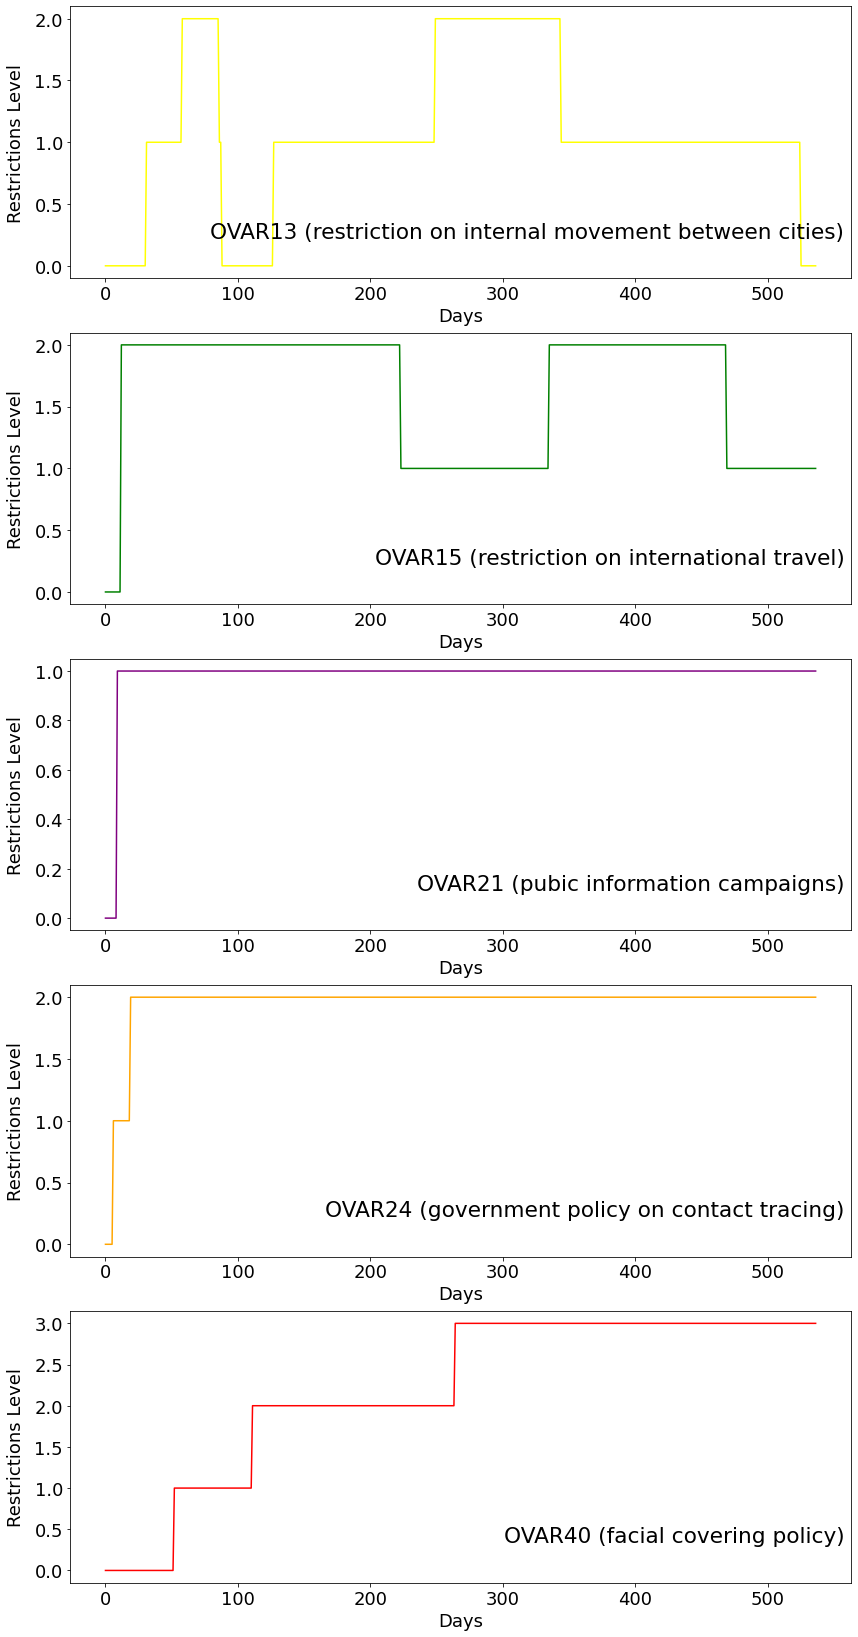

In [70]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

plt.rc('font', size=18)
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
# groups = [0, 1, 2, 3, 4, 5,6,7,8,9, 10, 11, 12, 13]
# groups = [0, 1, 2, 3]
# groups = [4, 5,6,7,8]
groups = [9, 10, 11, 12, 13]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [14, 29]
# pyplot.rcParams['figure.figsize'] = [14, 23]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	if group == 9:
		pyplot.plot(values[:, group],  color='yellow')
		pyplot.title(ddf.columns[group] + " (restriction on internal movement between cities) ", y=0.2, pad=-14,  loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)
	if group == 10:
		pyplot.plot(values[:, group],  color='green')
		pyplot.title(ddf.columns[group] + " (restriction on international travel) ", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)
	
	if group == 11:
		pyplot.plot(values[:, group],  color='purple')
		pyplot.title(ddf.columns[group] + " (pubic information campaigns) ", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)

	if group == 12:
		pyplot.plot(values[:, group],  color='orange')
		pyplot.title(ddf.columns[group] + " (government policy on contact tracing) ", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)

	if group == 13:
		pyplot.plot(values[:, group],  color='red')
		pyplot.title(ddf.columns[group] + " (facial covering policy) ", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Restrictions Level", labelpad=9.0)

	# pyplot.plot(values[:, group],  color='green')
	# plt.xlabel("Days")
	# plt.ylabel("Restriction Level")
	# pyplot.title(ddf.columns[group] + "(asds)", y=0.5, loc='right')
	i += 1

# plt.xlabel("Days")
# plt.ylabel("Restrictions Level", labelpad=9.0)
# plt.savefig('14_variables_graph.png')
plt.savefig("14_var_graph.png",dpi=300)
pyplot.show()

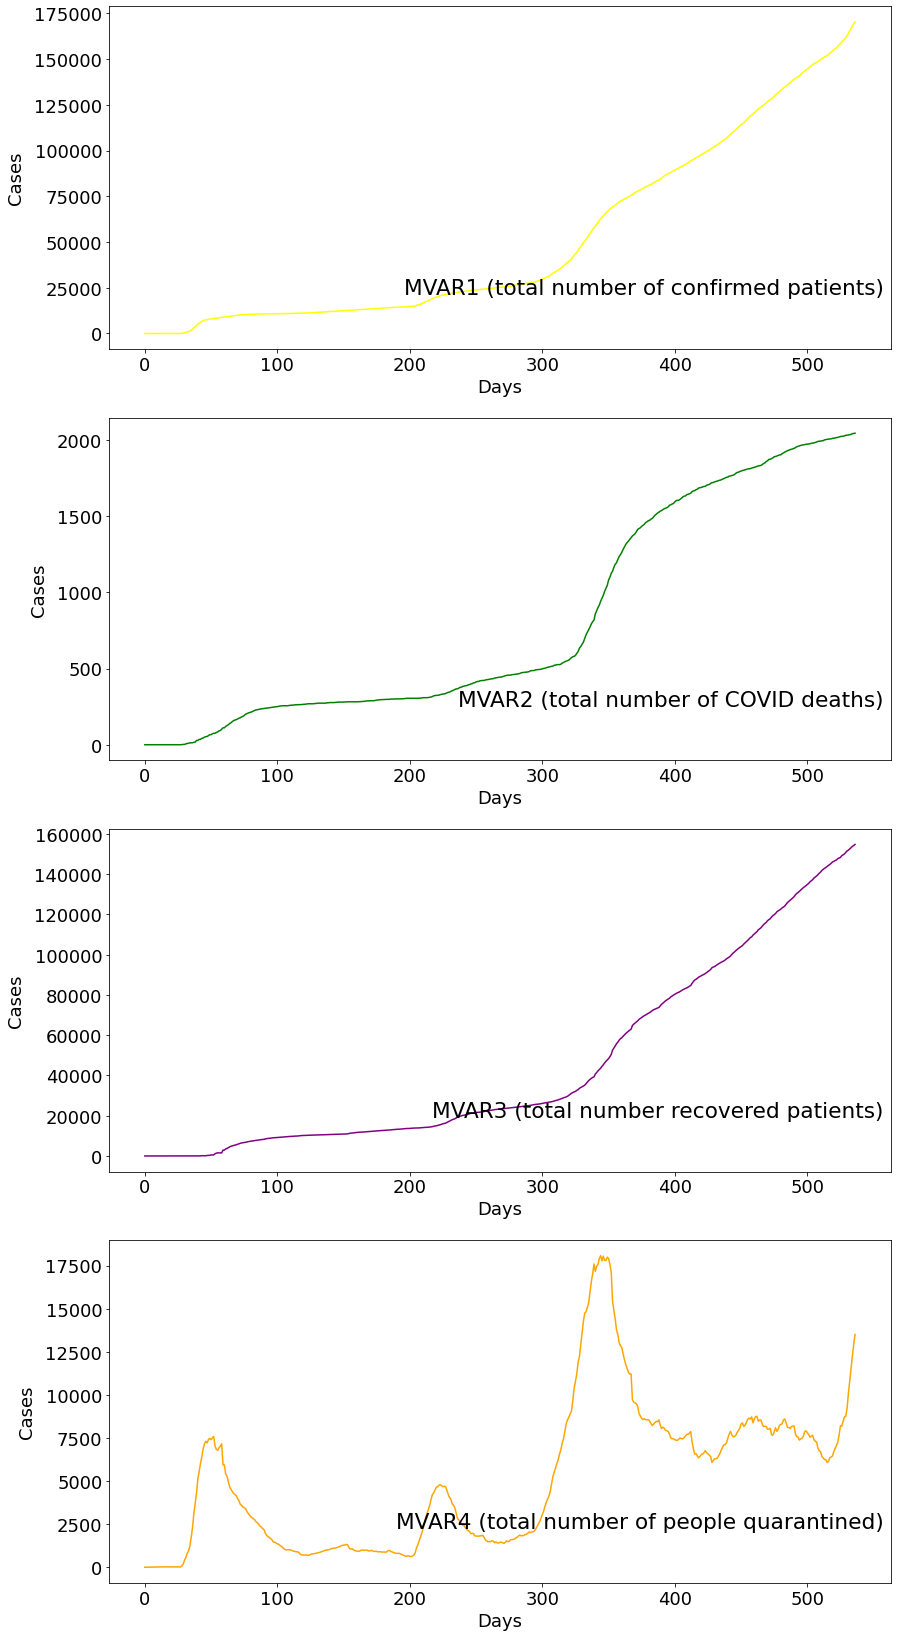

In [71]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

plt.rc('font', size=18)
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
# groups = [0, 1, 2, 3, 4, 5,6,7,8,9, 10, 11, 12, 13]
# groups = [0, 1, 2, 3]
# groups = [4, 5,6,7,8]
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [14, 25]
# pyplot.rcParams['figure.figsize'] = [14, 23]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	if group == 0:
		pyplot.plot(values[:, group],  color='yellow')
		pyplot.title(ddf.columns[group] + " (total number of confirmed patients) ", y=0.2, pad=-14,  loc='right')
		plt.xlabel("Days")
		plt.ylabel("Cases", labelpad=9.0)
	if group == 1:
		pyplot.plot(values[:, group],  color='green')
		pyplot.title(ddf.columns[group] + " (total number of COVID deaths) ", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Cases", labelpad=9.0)
	
	if group == 2:
		pyplot.plot(values[:, group],  color='purple')
		pyplot.title(ddf.columns[group] + " (total number recovered patients) ", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Cases", labelpad=9.0)

	if group == 3:
		pyplot.plot(values[:, group],  color='orange')
		pyplot.title(ddf.columns[group] + " (total number of people quarantined) ", y=0.2, pad=-14, loc='right')
		plt.xlabel("Days")
		plt.ylabel("Cases", labelpad=9.0)


	# pyplot.plot(values[:, group],  color='green')
	# plt.xlabel("Days")
	# plt.ylabel("Restriction Level")
	# pyplot.title(ddf.columns[group] + "(asds)", y=0.5, loc='right')
	i += 1

# plt.xlabel("Days")
# plt.ylabel("Restrictions Level", labelpad=9.0)
# plt.savefig('14_variables_graph.png')
plt.savefig("target_var_graph.png",dpi=300)
pyplot.show()

#### **LSTM DATA PREPARATION 2**

In [72]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 14)


In [73]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
# scaler = MinMaxScaler(feature_range=(0, 4))
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 14
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
reframed.drop(reframed.columns[[46,47,48,49,50,51,52,53,54,55]], axis=1, inplace=True)

print(reframed.shape)

# 24 input features and 8 output features 

(534, 46)


In [74]:
reframed.head()

var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3  -1.000000       -1.0       -1.0  -1.000000       -1.0       -1.0   
4  -0.999988       -1.0       -1.0  -0.999889       -1.0       -1.0   
5  -0.999988       -1.0       -1.0  -0.999889       -1.0       -1.0   
6  -0.999977       -1.0       -1.0  -0.999779       -1.0       -1.0   
7  -0.999965       -1.0       -1.0  -0.999668       -1.0       -1.0   

   var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  ...  var9(t-1)  var10(t-1)  \
3       -1.0       -1.0       -1.0        -1.0  ...       -1.0        -1.0   
4       -1.0       -1.0       -1.0        -1.0  ...       -1.0        -1.0   
5       -1.0       -1.0       -1.0        -1.0  ...       -1.0        -1.0   
6       -1.0       -1.0       -1.0        -1.0  ...       -1.0        -1.0   
7       -1.0       -1.0       -1.0        -1.0  ...       -1.0        -1.0   

   var11(t-1)  var12(t-1)  var13(t-1)  var14(t-1)   var1(t)  var2(t)  var3(t)  \
3        -1.0        -1.0        -1.0        -1.0 -0.999977     -1.0     -1.0   
4        -1.0        -1.0        -1.0        -1.0 -0.999965     -1.0     -1.0   
5        -1.0        -1.0        -1.0        -1.0 -0.999965     -1.0     -1.0   
6        -1.0        -1.0        -1.0        -1.0 -0.999965     -1.0     -1.0   
7        -1.0        -1.0         0.0        -1.0 -0.999965     -1.0     -1.0   

    var4(t)  
3 -0.999779  
4 -0.999668  
5 -0.999668  
6 -0.999668  
7 -0.999668  

[5 rows x 46 columns]

In [75]:
# split into train and test sets
values = reframed.values
n_train_hours = 400
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (400, 46)
Testing data shape:  (134, 46)


In [76]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -4:]
test_X, test_y = test[:, :n_obs], test[:, -4:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

42
Training split shape:  (400, 42) 400 (400, 4)
Testing split shape:  (134, 42) 134 (134, 4)


In [77]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(400, 3, 14) (400, 4) (134, 3, 14) (134, 4)


In [ ]:
# model = Sequential()
# model.add(Bidirectional(LSTM(174, return_sequences=True, activation='tanh'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
# # model.add(Bidirectional(LSTM(124, return_sequences=True, activation='tanh'), merge_mode="concat"))

# model.add(Bidirectional(LSTM(164, activation='tanh'), merge_mode="concat"))  # best neurons 164 or 124
# # 1st layer 184, 2nd layer 164

# # model.add(LSTM(32, activation="tanh"))
# model.add(Dense(train_y.shape[1]))

# adam = tf.keras.optimizers.Adam()
# ear_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=100,  # best is 100
#     mode='min', restore_best_weights=True
# )
# # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
# rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.42, patience=30)  # factor is 0.42 patience 30
# model.compile(loss=tf.losses.MeanAbsoluteError(),
#               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)
# # model.compile(loss=tf.losses.MeanSquaredError(),
# #               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

# history = model.fit(train_X, train_y, epochs=4500, callbacks = [ear_stop, rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=2, shuffle=False)  # batch_size  best 108   -> shuffle false

Epoch 1/4500
4/4 - 9s - loss: 0.6274 - mean_absolute_error: 0.6274 - val_loss: 0.5627 - val_mean_absolute_error: 0.5627
Epoch 2/4500
4/4 - 0s - loss: 0.3124 - mean_absolute_error: 0.3124 - val_loss: 0.6444 - val_mean_absolute_error: 0.6444
Epoch 3/4500
4/4 - 0s - loss: 0.2818 - mean_absolute_error: 0.2818 - val_loss: 0.5554 - val_mean_absolute_error: 0.5554
Epoch 4/4500
4/4 - 0s - loss: 0.1515 - mean_absolute_error: 0.1515 - val_loss: 0.4854 - val_mean_absolute_error: 0.4854
Epoch 5/4500
4/4 - 0s - loss: 0.1880 - mean_absolute_error: 0.1880 - val_loss: 0.4454 - val_mean_absolute_error: 0.4454
Epoch 6/4500
4/4 - 0s - loss: 0.1328 - mean_absolute_error: 0.1328 - val_loss: 0.4104 - val_mean_absolute_error: 0.4104
Epoch 7/4500
4/4 - 0s - loss: 0.1059 - mean_absolute_error: 0.1059 - val_loss: 0.3649 - val_mean_absolute_error: 0.3649
Epoch 8/4500
4/4 - 0s - loss: 0.1123 - mean_absolute_error: 0.1123 - val_loss: 0.3197 - val_mean_absolute_error: 0.3197
Epoch 9/4500
4/4 - 0s - loss: 0.0781 - m

In [78]:
# model.save('/content/drive/MyDrive/Korea university work/publication/14_Input_variables_rmse_5295')
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/14_Input_variables_rmse_5295')

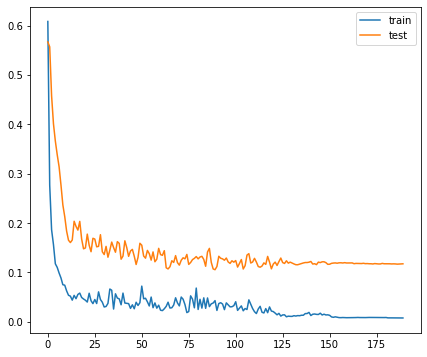

In [ ]:
# plot history
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [7, 6]
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('6_Input_Variables_Loss.png')
pyplot.show()


In [79]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
print(test_X.shape)
print("yhat : ", yhat.shape)

(134, 42)
yhat :  (134, 4)


In [80]:
inv_yhat = concatenate((yhat, test_X[:, -10:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, :4] 

test_y = test_y.reshape((len(test_y), 4))
inv_y = concatenate((test_y, test_X[:, -10:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, :4]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# best rmse 3865

Test RMSE: 5295.870


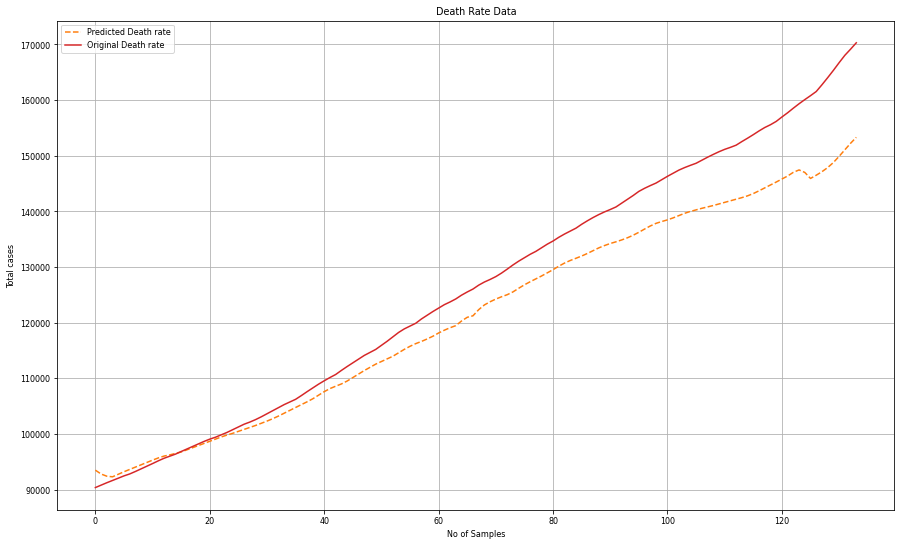

In [ ]:
dd = np.arange(134)
dd.shape

plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(15, 9))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
ax.plot(dd, inv_yhat[:, 0], color='tab:orange', label='Predicted Death rate', linestyle='dashed')
ax.plot(dd, inv_y[:, 0], color='tab:red', label='Original Death rate')

# Same as above
ax.set_xlabel('No of Samples')
ax.set_ylabel('Total cases')
ax.set_title('Death Rate Data')
ax.grid(True)
ax.legend(loc='upper left');
plt.savefig('6_Variables_outV1.png')

### **Fitting model on training data**

In [ ]:

# make a prediction
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
print(train_X.shape)


(400, 42)


In [ ]:
inv_yhat_train = concatenate((yhat_train, train_X[:, -10:]), axis=1)
inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
inv_yhat_train = inv_yhat_train[:, :4] 

train_y = train_y.reshape((len(train_y), 4))
inv_y_train = concatenate((train_y, train_X[:, -10:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:, :4]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Test RMSE: %.3f' % rmse)
# best rmse 4212

Test RMSE: 1182.898


# Combining both training and test data

In [ ]:
comb_d = np.concatenate((inv_y_train, inv_y))
comb_p = np.concatenate((inv_yhat_train, inv_yhat))
comb_p.shape

(534, 4)

####**PLotting graphs**

In [ ]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted New Quarantined Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]



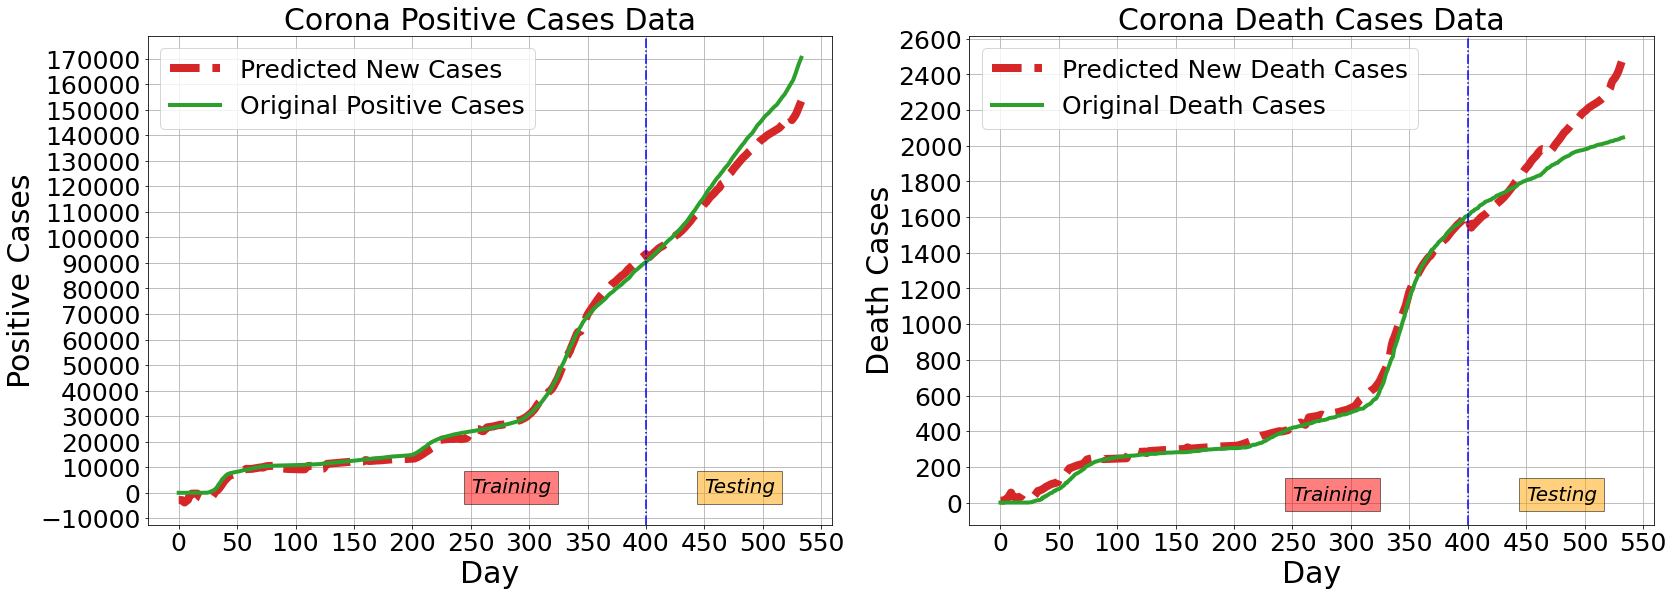

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rc('font', size=25)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 0], color='tab:red', label=L22[0], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 0], color='tab:green', label=L20[0], linewidth=4)
ax2.plot(comb_p[:, 1], color='tab:red', label=L22[1], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 1], color='tab:green', label=L20[1],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
ax1.set_ylabel("Positive Cases")
ax1.set_title(L21[0])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 25})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

ax2.set_xlabel('Day')
ax2.set_ylabel("Death Cases")
ax2.set_title(L21[1])
ax2.grid(True)
ax2.legend(loc='upper left');


plt.savefig("14_var_out_1.png",dpi=200)

In [ ]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted New Quarantined\n                Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]


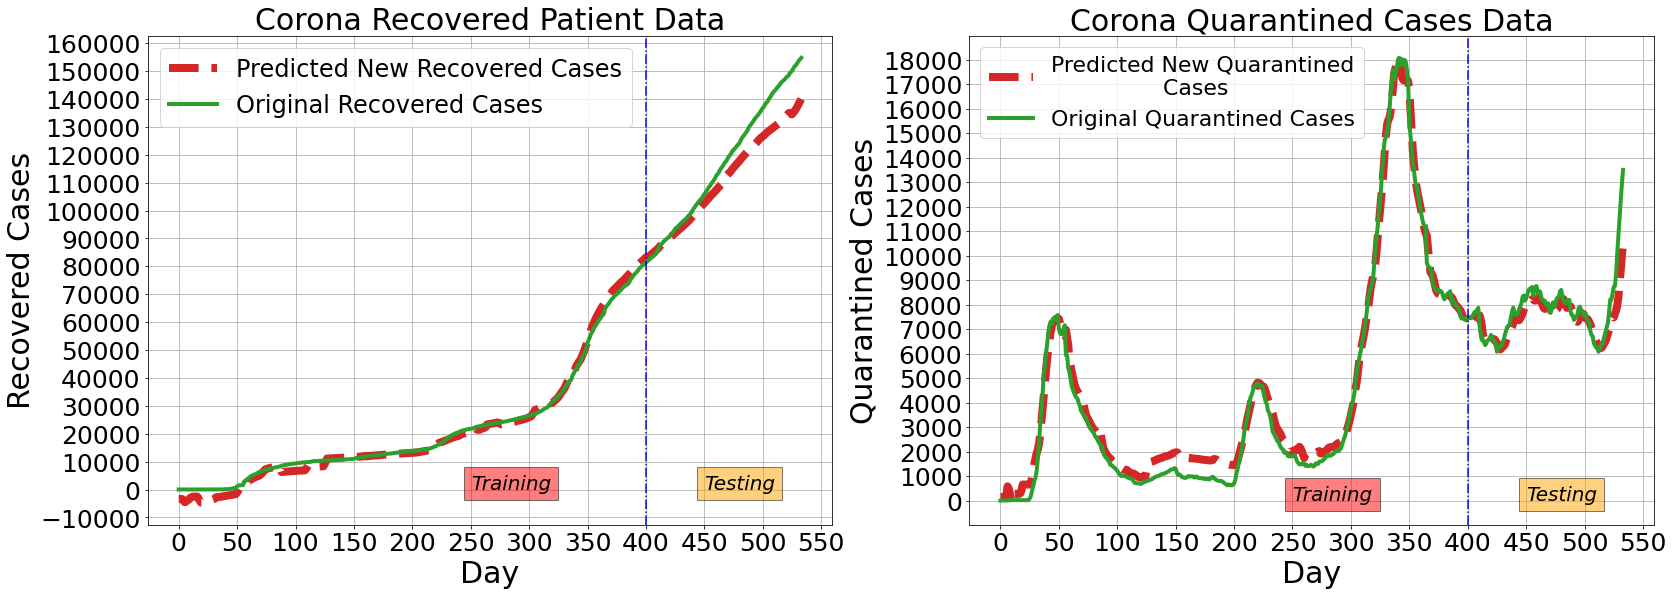

In [ ]:
from matplotlib.pyplot import figure
plt.rc('font', size=24)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 2], color='tab:red', label=L22[2], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 2], color='tab:green', label=L20[2], linewidth=4)
ax2.plot(comb_p[:, 3], color='tab:red', label=L22[3], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 3], color='tab:green', label=L20[3],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
ax1.set_ylabel(L23[2])
ax1.set_title(L21[2])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 22})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

ax2.set_xlabel('Day')
ax2.set_ylabel(L23[3])
ax2.set_title(L21[3])
ax2.grid(True)
ax2.legend(loc='upper left');

plt.savefig("14_var_out_2.png",dpi=200)

In [90]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error
mae = MAE(inv_yhat[:, 3], inv_y[:, 3])
print("Total Error MAE: ", mae)

Total Error MAE:  418.60645


In [91]:
rmse = sqrt(mean_squared_error(inv_y[:, 3], inv_yhat[:, 3]))
print('Test RMSE: %.2f' % rmse)

Test RMSE: 690.47


In [92]:
mape = mean_absolute_percentage_error(inv_yhat[:, 3], inv_y[:, 3])
print("Total Error MAPE: ", mape)

Total Error MAPE:  0.05358637


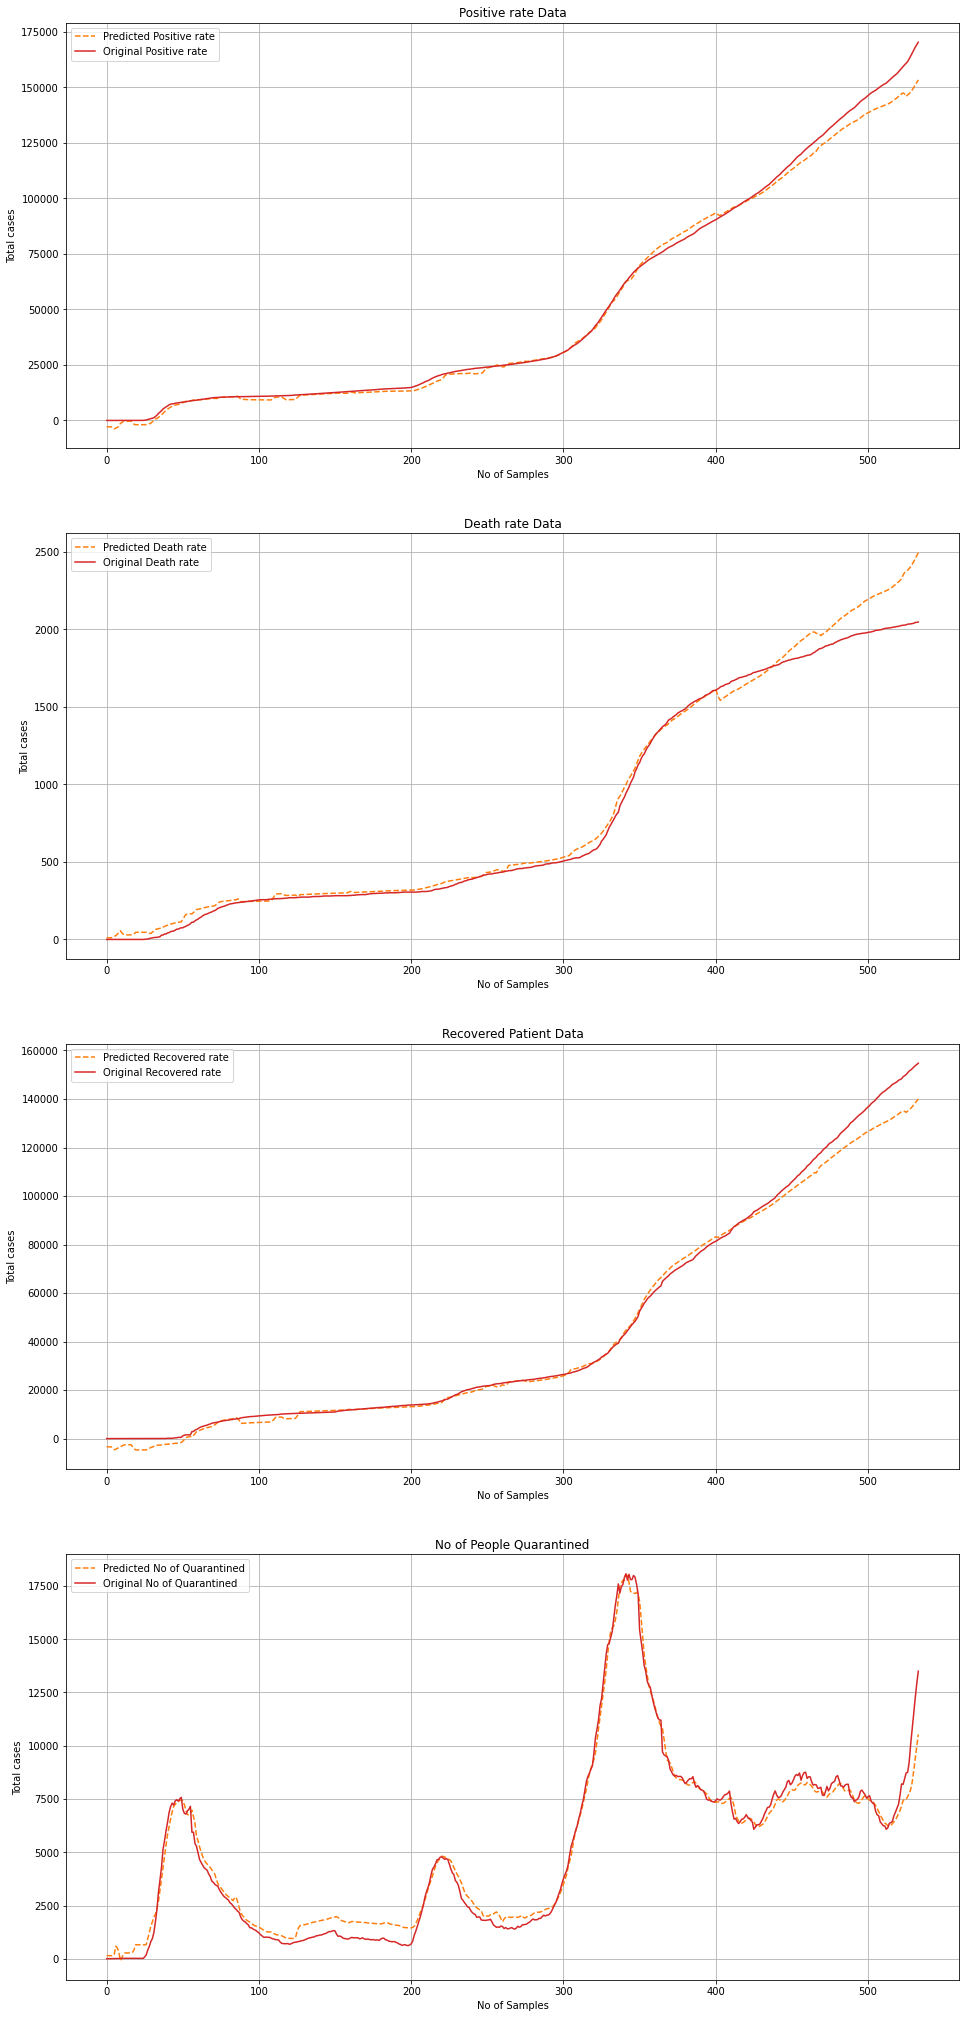

In [ ]:
plt.rc('font', size=10)
fig, ax = plt.subplots(4, figsize=(16, 36))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
for i in range(4):
  ax[i].plot(comb_p[:, i], color='tab:orange', label=L22[i], linestyle='dashed')
  ax[i].plot(comb_d[:, i], color='tab:red', label=L20[i])

  # Same as above
  ax[i].set_xlabel('No of Samples')
  ax[i].set_ylabel('Total cases')
  ax[i].set_title(L21[i])
  ax[i].grid(True)
  ax[i].legend(loc='upper left');

plt.savefig('14_variables_out_resultV1.png')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(yhat, test_y)
print("Error in percentage MAE:", mae)
mae = MAE(inv_yhat, inv_y)
print("Total Error MAE: ", mae)

mape = mean_absolute_percentage_error(yhat, test_y)
print("Error in percentage MAPE:", mape)
mape = mean_absolute_percentage_error(inv_yhat, inv_y)
print("Total Error MAPE: ", mape)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Error in percentage MAE: 0.0816509
Total Error MAE:  3053.0261
Error in percentage MAPE: 0.21320291
Total Error MAPE:  0.05277007
Test RMSE: 5295.883


### **Dropping 2 inputs Params**

In [ ]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)

dd = df[df["ISO3"] == "KOR"]
# sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
dd.head()

ISO3  MVAR1     DATE  MVAR2  ...  OVAR15  OVAR21  OVAR24  OVAR40
DATE                                 ...                                
31DEC19  KOR    NaN  31DEC19    NaN  ...     NaN     NaN     NaN     NaN
01JAN20  KOR    NaN  01JAN20    NaN  ...     0.0     0.0     0.0     0.0
02JAN20  KOR    NaN  02JAN20    NaN  ...     0.0     0.0     0.0     0.0
03JAN20  KOR    NaN  03JAN20    NaN  ...     0.0     0.0     0.0     0.0
04JAN20  KOR    NaN  04JAN20    NaN  ...     0.0     0.0     0.0     0.0

[5 rows x 16 columns]

In [ ]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [ ]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ISO3  MVAR1       DATE  MVAR2  ...  OVAR15  OVAR21  OVAR24  OVAR40
DATE                                   ...                                
23JAN20  KOR    1.0 2020-01-23    0.0  ...     0.0     0.0     0.0     0.0
24JAN20  KOR    2.0 2020-01-24    0.0  ...     0.0     0.0     0.0     0.0
25JAN20  KOR    2.0 2020-01-25    0.0  ...     0.0     0.0     0.0     0.0
26JAN20  KOR    3.0 2020-01-26    0.0  ...     0.0     0.0     0.0     0.0
27JAN20  KOR    4.0 2020-01-27    0.0  ...     0.0     0.0     0.0     0.0

[5 rows x 16 columns]

In [ ]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
ddf.drop(columns=["DATE", "MVAR3", "MVAR4", "ISO3"], axis=1, inplace=True)
ddf.head() 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MVAR1  MVAR2  OVAR1  OVAR3  ...  OVAR15  OVAR21  OVAR24  OVAR40
DATE                                 ...                                
23JAN20    1.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
24JAN20    2.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
25JAN20    2.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
26JAN20    3.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
27JAN20    4.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0

[5 rows x 12 columns]

IndexError: ignored

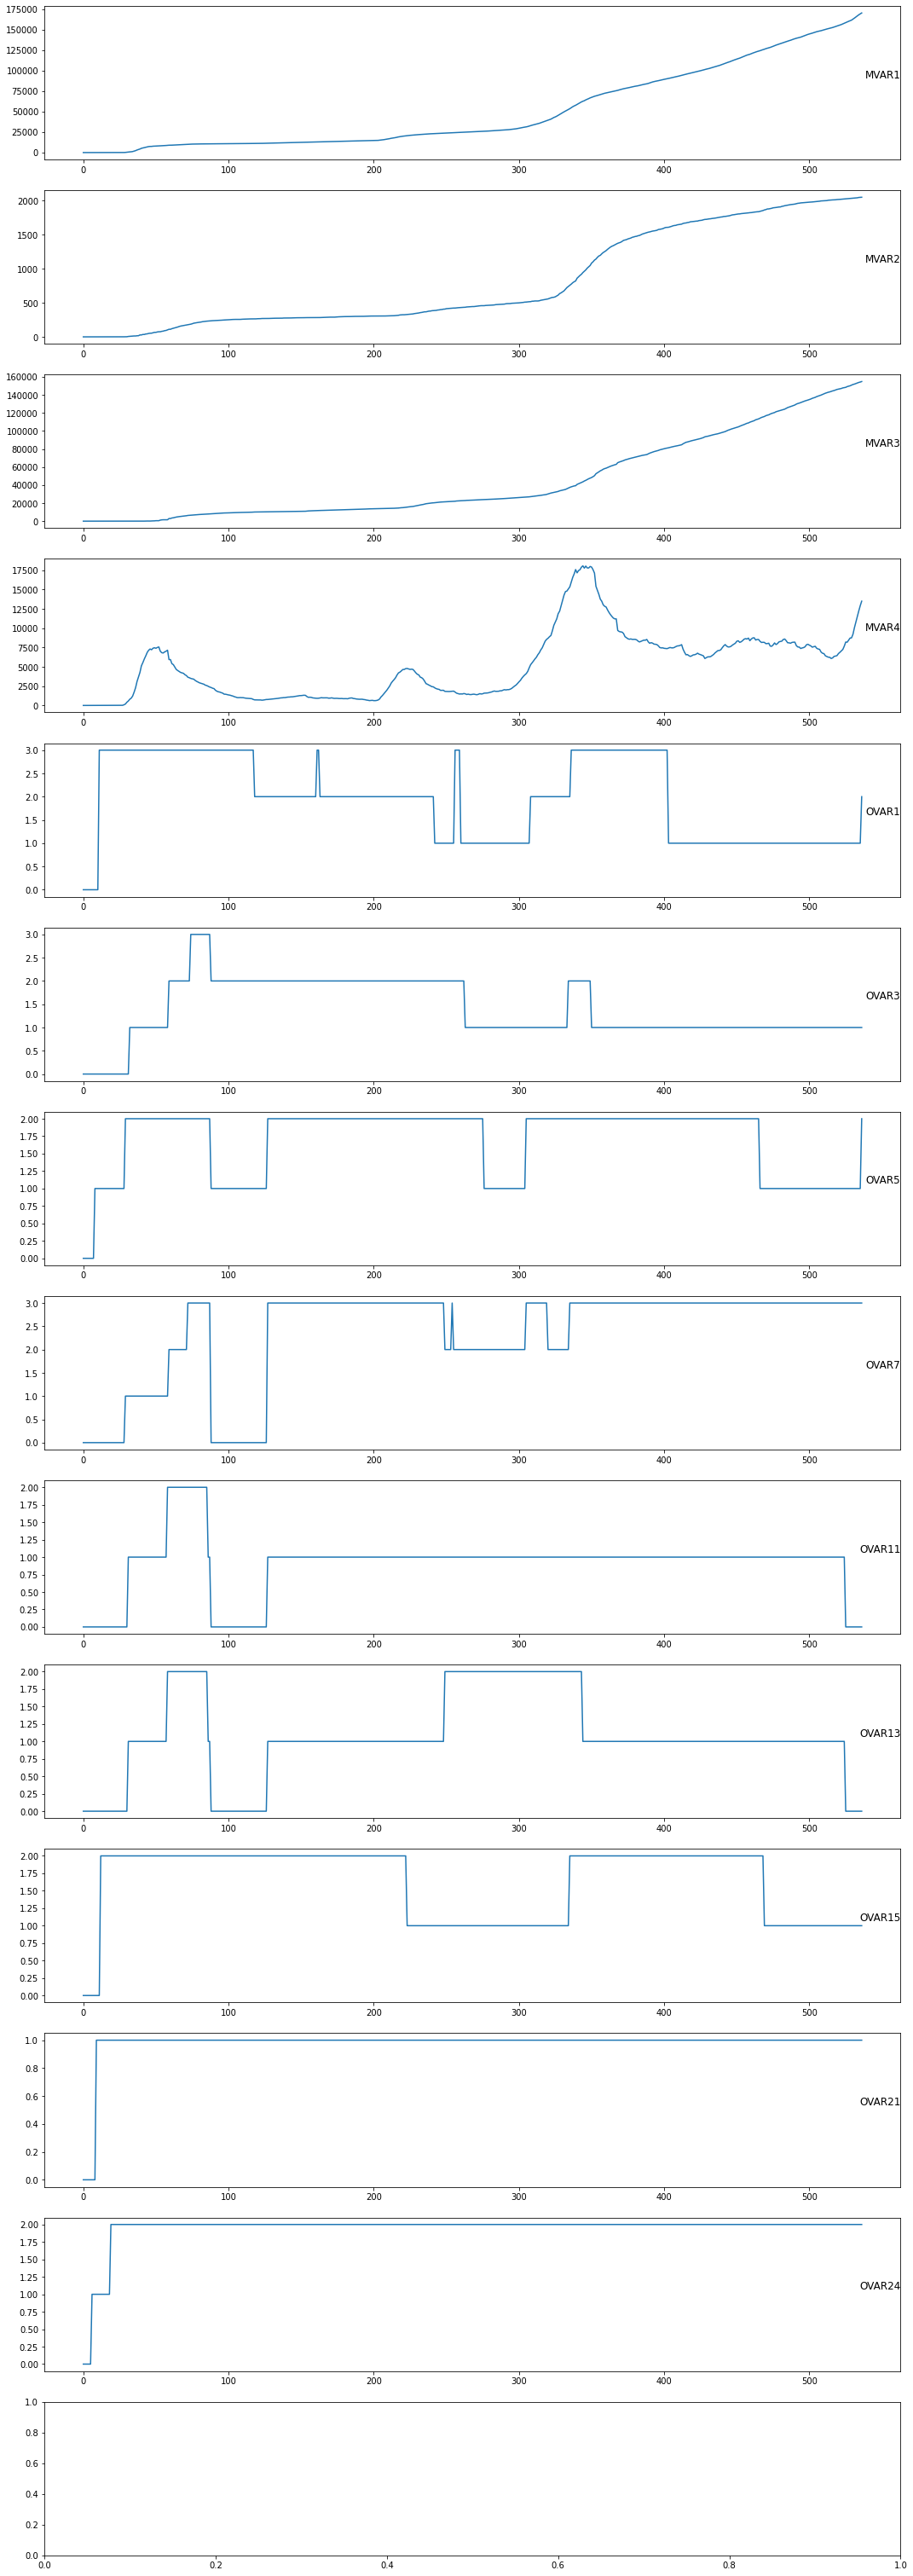

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5,6,7,8,9, 10, 11, 12, 13]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [18, 48]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(ddf.columns[group], y=0.5, loc='right')
	i += 1
plt.savefig('dropping2_param_14_variables_graph.png')
pyplot.show()

#### **LSTM DATA PREPARATION 3**

In [ ]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 12)


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
# scaler = MinMaxScaler(feature_range=(0, 4))
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 12
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
reframed.drop(reframed.columns[[38,39,40,41,42,43,44,45,46,47]], axis=1, inplace=True)

print(reframed.shape)

# 24 input features and 8 output features 

(534, 38)


In [ ]:
reframed.head()

var1(t-3)  var2(t-3)  var3(t-3)  ...  var12(t-1)   var1(t)  var2(t)
3  -1.000000       -1.0       -1.0  ...        -1.0 -0.999977     -1.0
4  -0.999988       -1.0       -1.0  ...        -1.0 -0.999965     -1.0
5  -0.999988       -1.0       -1.0  ...        -1.0 -0.999965     -1.0
6  -0.999977       -1.0       -1.0  ...        -1.0 -0.999965     -1.0
7  -0.999965       -1.0       -1.0  ...        -1.0 -0.999965     -1.0

[5 rows x 38 columns]

In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = 400
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (400, 38)
Testing data shape:  (134, 38)


In [ ]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -2:]
test_X, test_y = test[:, :n_obs], test[:, -2:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

36
Training split shape:  (400, 36) 400 (400, 2)
Testing split shape:  (134, 36) 134 (134, 2)


In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(400, 3, 12) (400, 2) (134, 3, 12) (134, 2)


In [ ]:
# This is perfect model of all time
model = Sequential()
model.add(Bidirectional(LSTM(164, return_sequences=True, activation='tanh'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
# model.add(Bidirectional(LSTM(124, return_sequences=True, activation='tanh'), merge_mode="concat"))

model.add(Bidirectional(LSTM(144, activation='tanh'), merge_mode="concat"))  # best neurons 164 or 124
# 1st layer 164, 2nd layer 164

# model.add(LSTM(32, activation="tanh"))
model.add(Dense(train_y.shape[1]))

adam = tf.keras.optimizers.Adam()
ear_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=100,  # best is 100
    mode='min', restore_best_weights=True
)
# rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=30)  # factor is 0.4 patience 30 0.1
model.compile(loss=tf.losses.MeanAbsoluteError(),
              metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)
# model.compile(loss=tf.losses.MeanSquaredError(),
#               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

history = model.fit(train_X, train_y, epochs=4500, callbacks = [ear_stop, rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=2, shuffle=True)  # batch_size  best 108   -> shuffle True

Epoch 1/4500
4/4 - 9s - loss: 0.4771 - mean_absolute_error: 0.4771 - val_loss: 1.0984 - val_mean_absolute_error: 1.0984
Epoch 2/4500
4/4 - 0s - loss: 0.2670 - mean_absolute_error: 0.2670 - val_loss: 0.8567 - val_mean_absolute_error: 0.8567
Epoch 3/4500
4/4 - 0s - loss: 0.1771 - mean_absolute_error: 0.1771 - val_loss: 0.6904 - val_mean_absolute_error: 0.6904
Epoch 4/4500
4/4 - 0s - loss: 0.1350 - mean_absolute_error: 0.1350 - val_loss: 0.5916 - val_mean_absolute_error: 0.5916
Epoch 5/4500
4/4 - 0s - loss: 0.0759 - mean_absolute_error: 0.0759 - val_loss: 0.4526 - val_mean_absolute_error: 0.4526
Epoch 6/4500
4/4 - 0s - loss: 0.0694 - mean_absolute_error: 0.0694 - val_loss: 0.3493 - val_mean_absolute_error: 0.3493
Epoch 7/4500
4/4 - 0s - loss: 0.0544 - mean_absolute_error: 0.0544 - val_loss: 0.3961 - val_mean_absolute_error: 0.3961
Epoch 8/4500
4/4 - 0s - loss: 0.0425 - mean_absolute_error: 0.0425 - val_loss: 0.4486 - val_mean_absolute_error: 0.4486
Epoch 9/4500
4/4 - 0s - loss: 0.0390 - m

In [ ]:
# model.save('/content/drive/MyDrive/Korea university work/publication/Dropping_2_Input_variables14_rmse_6962')
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/Dropping_2_Input_variables6_rmse_1497')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Korea university work/publication/Dropping_2_Input_variables14_rmse_6962/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Korea university work/publication/Dropping_2_Input_variables14_rmse_6962/assets


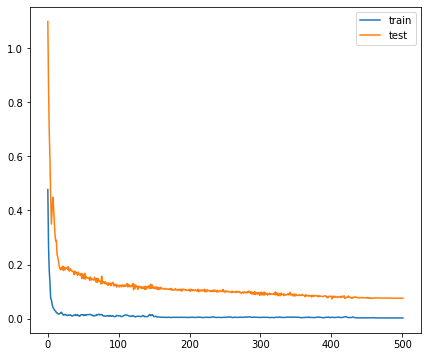

In [ ]:
# plot history
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [7, 6]
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('Dropping2_Input_Variables_Loss.png')
pyplot.show()


In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
print(test_X.shape)
print("yhat : ", yhat.shape)

(134, 36)
yhat :  (134, 2)


In [ ]:
inv_yhat = concatenate((yhat, test_X[:, -10:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, :2] 

test_y = test_y.reshape((len(test_y), 2))
inv_y = concatenate((test_y, test_X[:, -10:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, :2]

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# best rmse 1455

Test RMSE: 6962.724


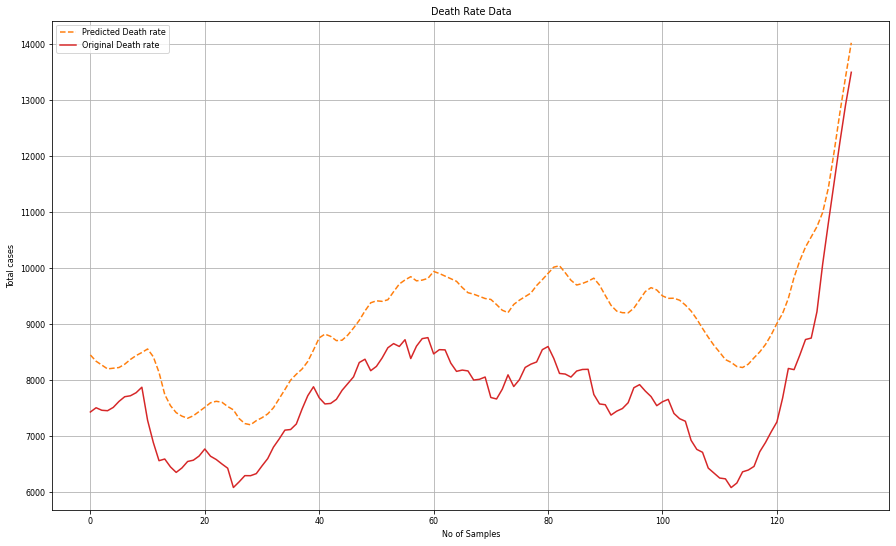

In [ ]:
dd = np.arange(134)
dd.shape

plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(15, 9))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
ax.plot(dd, inv_yhat[:, 1], color='tab:orange', label='Predicted Death rate', linestyle='dashed')
ax.plot(dd, inv_y[:, 1], color='tab:red', label='Original Death rate')

# Same as above
ax.set_xlabel('No of Samples')
ax.set_ylabel('Total cases')
ax.set_title('Death Rate Data')
ax.grid(True)
ax.legend(loc='upper left');
plt.savefig('Dropping2_Input_Variables_out.png')

### **Fitting model on training data**

In [ ]:

# make a prediction
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
print(train_X.shape)

(400, 36)


In [ ]:
inv_yhat_train = concatenate((yhat_train, train_X[:, -10:]), axis=1)
inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
inv_yhat_train = inv_yhat_train[:, :2] 

train_y = train_y.reshape((len(train_y), 2))
inv_y_train = concatenate((train_y, train_X[:, -10:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:, :2]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Test RMSE: %.3f' % rmse)
# best rmse 4212

Test RMSE: 353.864


# Combining both training and test data

In [ ]:
comb_d = np.concatenate((inv_y_train, inv_y))
comb_p = np.concatenate((inv_yhat_train, inv_yhat))
comb_p.shape

(534, 2)

####**PLotting graphs**

In [ ]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted Positive rate", "Predicted Death rate", "Predicted Recovered rate",  "Predicted No of Quarantined"]
L20 = ["Original Positive rate", "Original Death rate", "Original Recovered rate", "Original No of Quarantined"]
L21 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]


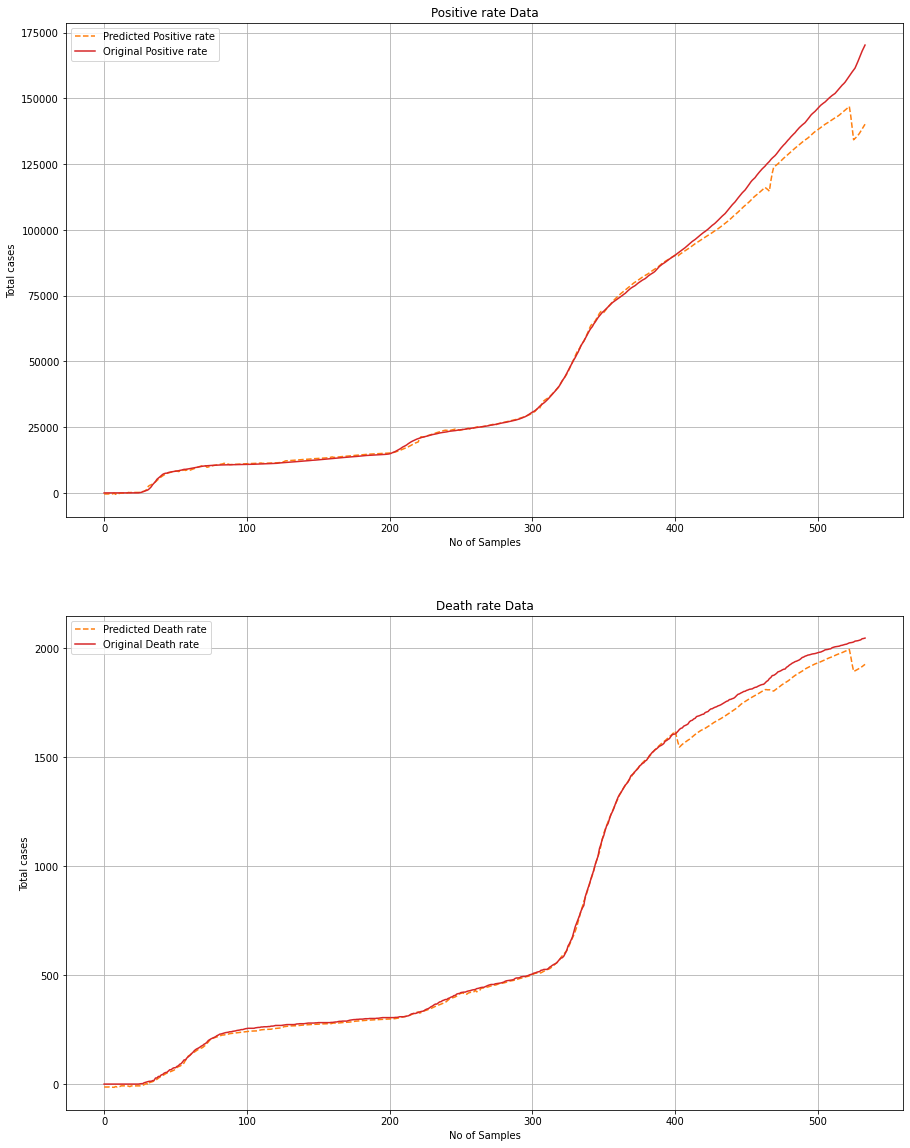

In [ ]:
plt.rc('font', size=10)
fig, ax = plt.subplots(2, figsize=(15, 20))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
for i in range(2):
  ax[i].plot(comb_p[:, i], color='tab:orange', label=L22[i], linestyle='dashed')
  ax[i].plot(comb_d[:, i], color='tab:red', label=L20[i])

  # Same as above
  ax[i].set_xlabel('No of Samples')
  ax[i].set_ylabel('Total cases')
  ax[i].set_title(L21[i])
  ax[i].grid(True)
  ax[i].legend(loc='upper left');

plt.savefig('Dropping2_Input_Variables14_out.png')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(yhat, test_y)
print("Error in percentage MAE:", mae)
mae = MAE(inv_yhat, inv_y)
print("Total Error MAE: ", mae)

mape = mean_absolute_percentage_error(yhat, test_y)
print("Error in percentage MAPE:", mape)
mape = mean_absolute_percentage_error(inv_yhat, inv_y)
print("Total Error MAPE: ", mape)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Error in percentage MAE: 0.07310032
Total Error MAE:  3725.6057
Error in percentage MAPE: 0.14748444
Total Error MAPE:  0.046180073
Test RMSE: 6962.724
